In [1]:
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
class Sentiment:
    NEGATIVE = "NEGATIVE"
    NEUTRAL = "NEUTRAL"
    POSITIVE = "POSITIVE"

class Review:
    def __init__(self, text, score):
        self.text = text
        self.score = score
        self.sentiment = self.get_sentiment()
        
    def get_sentiment(self):
        if self.score <= 2:
            return Sentiment.NEGATIVE
        elif self.score == 3:
            return Sentiment.NEUTRAL
        else: #Score of 4 or 5
            return Sentiment.POSITIVE
        
        
file_name = 'books_review.json'
reviews = []
with open(file_name) as f:
    for line in f:
        review = json.loads(line)
        reviews.append(Review(review['reviewText'], review['overall']))
        
print('Review : \n', reviews[0].text)
print('Sentiment :', reviews[0].sentiment)

Review : 
 I bought both boxed sets, books 1-5.  Really a great series!  Start book 1 three weeks ago and just finished book 5.  Sloane Monroe is a great character and being able to follow her through both private life and her PI life gets a reader very involved!  Although clues may be right in front of the reader, there are twists and turns that keep one guessing until the last page!  These are books you won't be disappointed with.
Sentiment : POSITIVE


In [3]:
from sklearn.model_selection import train_test_split

training, test = train_test_split(reviews, test_size=0.33, random_state=42)

In [4]:
train_x = [x.text for x in training]
train_y = [x.sentiment for x in training]

test_x = [x.text for x in test]
test_y = [x.sentiment for x in test]

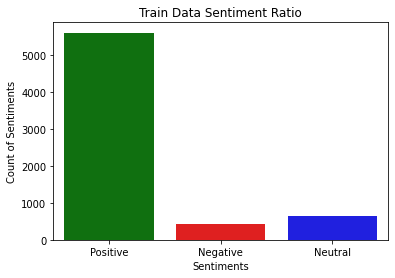

Positive : 5611, Negative : 436, Neutral : 653


In [5]:
positive = train_y.count(Sentiment.POSITIVE)
negative = train_y.count(Sentiment.NEGATIVE)
neutral = train_y.count(Sentiment.NEUTRAL)

flatui = ["g", "r", 'b']
sns.set_palette(flatui)
sns.barplot(['Positive','Negative', 'Neutral'],[positive,negative, neutral])
plt.xlabel('Sentiments')
plt.ylabel('Count of Sentiments')
plt.title('Train Data Sentiment Ratio')
plt.show()
print(f'Positive : {positive}, Negative : {negative}, Neutral : {neutral}')

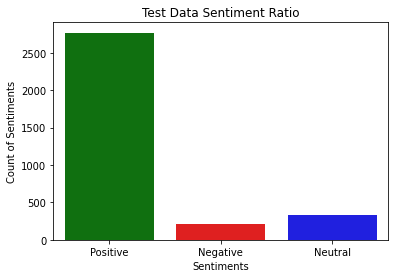

Positive : 2767, Negative : 208, Neutral : 325


In [6]:
positive = test_y.count(Sentiment.POSITIVE)
negative = test_y.count(Sentiment.NEGATIVE)
neutral = test_y.count(Sentiment.NEUTRAL)

flatui = ["g", "r", 'b']
sns.set_palette(flatui)
sns.barplot(['Positive','Negative', 'Neutral'],[positive,negative, neutral])
plt.xlabel('Sentiments')
plt.ylabel('Count of Sentiments')
plt.title('Test Data Sentiment Ratio')
plt.show()
print(f'Positive : {positive}, Negative : {negative}, Neutral : {neutral}')

### Imbalance dataset is not good for building good model
### Data imbalance usually reflects an unequal distribution of classes within a dataset

In [7]:
# balance the data

class ReviewContainer:
    def __init__(self, reviews):
        self.reviews = reviews
        
    def get_text(self):
        return [x.text for x in self.reviews]
    
    def get_sentiment(self):
        return [x.sentiment for x in self.reviews]
        
    def evenly_distribute(self):
        negative = list(filter(lambda x: x.sentiment == Sentiment.NEGATIVE, self.reviews))
        positive = list(filter(lambda x: x.sentiment == Sentiment.POSITIVE, self.reviews))
        positive_shrunk = positive[:len(negative)]
        self.reviews = negative + positive_shrunk
        np.random.shuffle(self.reviews)

In [8]:
train_container = ReviewContainer(training)
test_container = ReviewContainer(test)

train_container.evenly_distribute()
train_x = train_container.get_text()
train_y = train_container.get_sentiment()

test_container.evenly_distribute()
test_x = test_container.get_text()
test_y = test_container.get_sentiment()

print(train_y.count(Sentiment.POSITIVE))
print(train_y.count(Sentiment.NEGATIVE))

436
436


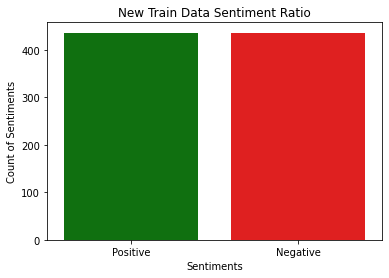

In [9]:
positive = train_y.count(Sentiment.POSITIVE)
negative = train_y.count(Sentiment.NEGATIVE)

flatui = ["g", "r"]
sns.set_palette(flatui)
sns.barplot(['Positive','Negative'],[positive,negative])
plt.xlabel('Sentiments')
plt.ylabel('Count of Sentiments')
plt.title('New Train Data Sentiment Ratio')
plt.show()


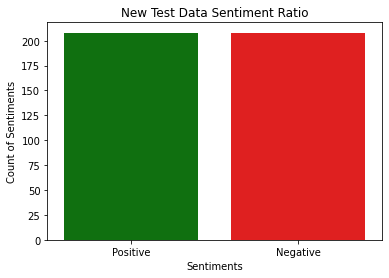

Positive : 208, Negative : 208


In [10]:
positive = test_y.count(Sentiment.POSITIVE)
negative = test_y.count(Sentiment.NEGATIVE)

flatui = ["g", "r"]
sns.set_palette(flatui)
sns.barplot(['Positive','Negative'],[positive,negative])
plt.xlabel('Sentiments')
plt.ylabel('Count of Sentiments')
plt.title('New Test Data Sentiment Ratio')
plt.show()
print(f'Positive : {positive}, Negative : {negative}')

In [11]:
# bag of words

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
train_x_vectors = vectorizer.fit_transform(train_x)

test_x_vectors = vectorizer.transform(test_x)

print(train_x[0])
print(train_x_vectors[0].toarray())

Our grandson, who is 8 years old, asked for another book in the Hardy Boys series for Christmas so we got him this one.  He has not read it yet but was excited when he opened it!
[[0. 0. 0. ... 0. 0. 0.]]


In [12]:
# classification using svm model

from sklearn import svm

clf_svm = svm.SVC()

clf_svm.fit(train_x_vectors, train_y)

print(f'Sample test review : \n "{test_x[7]}"')

print('Prediction using svm :', clf_svm.predict(test_x_vectors[7])[0])

Sample test review : 
 "Hard to put this book down. I found I really cared about the characters and was drawn into the story."
Prediction using svm : NEGATIVE


In [13]:
# classification using decision tree model

from sklearn.tree import DecisionTreeClassifier

clf_tree = DecisionTreeClassifier()
clf_tree.fit(train_x_vectors, train_y)

print(f'Sample test review : \n "{test_x[7]}"')

print('Prediction using decision tree :', clf_tree.predict(test_x_vectors[7])[0])

Sample test review : 
 "Hard to put this book down. I found I really cared about the characters and was drawn into the story."
Prediction using decision tree : NEGATIVE


In [14]:
# classification using logistic regression model

from sklearn.linear_model import LogisticRegression

clf_log = LogisticRegression()
clf_log.fit(train_x_vectors, train_y)

print(f'Sample test review : \n "{test_x[7]}"')

print('Prediction using naive bayes :', clf_log.predict(test_x_vectors[7])[0])

Sample test review : 
 "Hard to put this book down. I found I really cared about the characters and was drawn into the story."
Prediction using naive bayes : NEGATIVE


In [15]:
# Check Mean Accuracy
print(f'Mean accuracy of svm : {clf_svm.score(test_x_vectors, test_y)}')
print(f'Mean accuracy of svm : {clf_tree.score(test_x_vectors, test_y)}')
print(f'Mean accuracy of svm : {clf_log.score(test_x_vectors, test_y)}')

Mean accuracy of svm : 0.8100961538461539
Mean accuracy of svm : 0.6370192307692307
Mean accuracy of svm : 0.8052884615384616


In [16]:
# f1 score
from sklearn.metrics import f1_score

print('SVM f1 score for (+) and (-) :',f1_score(test_y, clf_svm.predict(test_x_vectors), average=None, labels=[Sentiment.POSITIVE, Sentiment.NEGATIVE]))
print('Decision tree f1 score for (+) and (-) :',f1_score(test_y, clf_tree.predict(test_x_vectors), average=None, labels=[Sentiment.POSITIVE, Sentiment.NEGATIVE]))
print('Logistic regression f1 score for (+) and (-) :',f1_score(test_y, clf_log.predict(test_x_vectors), average=None, labels=[Sentiment.POSITIVE, Sentiment.NEGATIVE]))

SVM f1 score for (+) and (-) : [0.80871671 0.81145585]
Decision tree f1 score for (+) and (-) : [0.62899263 0.64470588]
Logistic regression f1 score for (+) and (-) : [0.80291971 0.80760095]


#### SVM is the best model among other model for this case!

In [17]:
# PLAY AROUND
test_set = ['very good books', "loved the cover", 'bad book ever']
new_test = vectorizer.transform(test_set)

clf_svm.predict(new_test)

array(['POSITIVE', 'POSITIVE', 'NEGATIVE'], dtype='<U8')

### Confusion matrix

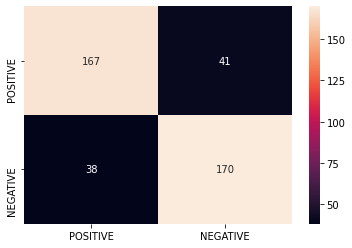

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
import matplotlib as plt

y_pred = clf_svm.predict(test_x_vectors)

labels = [Sentiment.POSITIVE, Sentiment.NEGATIVE]

cm = confusion_matrix(test_y, y_pred, labels=labels)
df_cm = pd.DataFrame(cm, index=labels, columns=labels)

sns.heatmap(df_cm, annot=True, fmt='d')
